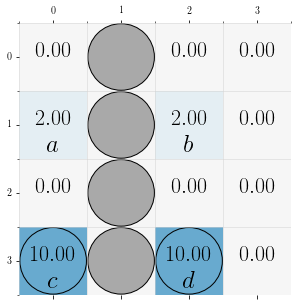

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from csrl.mdp import GridMDP
import numpy as np 
from copy import deepcopy

shape = n_rows, n_cols = (4,4)

structure = np.array([
['E','B','E','E'],
['E','B','E','E'],
['E','B','E','E'],
['T','B','T','E'],
['E','E','E','E']
])

label = np.empty(shape,dtype=object)
label.fill(())
label[1,0] = ('a',)
label[1,2] = ('b',)
label[3,0] = ('c',)
label[3,2] = ('d',)

rew_structure =  np.empty(shape,dtype=float)
rew_structure.fill(0.0)
rew_structure[1,0] = 2
rew_structure[1,2] = 2
rew_structure[3,2] = 10
rew_structure[3,0] = 10
    
grid_mdp = GridMDP(shape=shape, reward=rew_structure, structure=structure,label=label,figsize=5, p=0.8)
grid_mdp.plot()

In [2]:
from csrl.oa import OmegaAutomaton

# LTL Specification
ltl = '((Fa & !c) U (a & b)) & ((Fb & !d) U (a&b)) & (FG c) & (FG d)'
ltl1 = '((Fa & !c) U (b)) & (FG c) & ((Fb & !d) U (a)) & (FG d) '
ltl2 = '((Fb & !d) U (a)) & (FG d)' 
# (!d U b) & F(b & a) & F(b U a) & (FG d)
#  '((Fa & !c) U (a&b))& ((Fb & !d) U (a&b)) & (FG c) & (FG d)'
# '((!c & !d) U F(a & b)) & (FG c) & (FG d)'

# Translate the LTL formula to an LDBA
oa1 = OmegaAutomaton(ltl, extra_aps=grid_mdp.all_labels)

print('Number of Omega-automaton states (including the trap state):',oa1.shape[1])
display(oa1)

Number of Omega-automaton states (including the trap state): 4


In [4]:
oa1._repr_html_()

'<div><?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 2.40.1 (20161225.0304)\n -->\n<!-- Pages: 1 -->\n<svg width="296pt" height="148pt"\n viewBox="0.00 0.00 296.00 148.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1.0 1.0) rotate(0) translate(4 144)">\n<polygon fill="#ffffff" stroke="transparent" points="-4,4 -4,-144 292,-144 292,4 -4,4"/>\n<text text-anchor="start" x="123" y="-125.8" font-family="Lato" font-size="14.00" fill="#000000">Inf(</text>\n<text text-anchor="start" x="145" y="-125.8" font-family="Lato" font-size="14.00" fill="#1f78b4">⓿</text>\n<text text-anchor="start" x="161" y="-125.8" font-family="Lato" font-size="14.00" fill="#000000">)</text>\n<text text-anchor="start" x="121" y="-111.8" font-family="Lato" font-size="14.00" fill="#000000">[Büchi

In [3]:
from csrl import ControlSynthesis
import numpy as np 

# Construct product MDPs
csrl1 = ControlSynthesis(grid_mdp,oa1)

csrl2 = ControlSynthesis(grid_mdp,oa1) 

In [4]:
from multi import MultiControlSynthesis

mcsrl = MultiControlSynthesis([csrl1, csrl2], oa = oa1, starts=[(0, 0), (0, 3)], mdp=grid_mdp, sharedoa=True)
mcsrl.shape

(2, 1, 4, 4, 4, 8)

### Test 1

In [3]:
oa1.acc

[{(): [None],
  ('a',): [None],
  ('b',): [None],
  ('c',): [None],
  ('d',): [None],
  ('a', 'b'): [None],
  ('a', 'c'): [None],
  ('a', 'd'): [None],
  ('b', 'c'): [None],
  ('b', 'd'): [None],
  ('c', 'd'): [None],
  ('a', 'b', 'c'): [None],
  ('a', 'b', 'd'): [None],
  ('a', 'c', 'd'): [None],
  ('b', 'c', 'd'): [None],
  ('a', 'b', 'c', 'd'): [None]},
 {(): [None],
  ('a',): [None],
  ('b',): [None],
  ('c',): [None],
  ('d',): [None],
  ('a', 'b'): [None],
  ('a', 'c'): [None],
  ('a', 'd'): [None],
  ('b', 'c'): [None],
  ('b', 'd'): [None],
  ('c', 'd'): [None],
  ('a', 'b', 'c'): [None],
  ('a', 'b', 'd'): [None],
  ('a', 'c', 'd'): [None],
  ('b', 'c', 'd'): [None],
  ('a', 'b', 'c', 'd'): [None]},
 {(): [None],
  ('a',): [None],
  ('b',): [None],
  ('c',): [None],
  ('d',): [None],
  ('a', 'b'): [None],
  ('a', 'c'): [None],
  ('a', 'd'): [None],
  ('b', 'c'): [None],
  ('b', 'd'): [None],
  ('c', 'd'): [True],
  ('a', 'b', 'c'): [None],
  ('a', 'b', 'd'): [None],
  ('a', 'c

In [5]:
ltl3 = '((Fa & !c) U (a & b)) & FG c'
oa2 = OmegaAutomaton(ltl3, extra_aps=grid_mdp.all_labels)
display(oa2)

In [6]:
oa2.eps

[[], [2], [], []]

In [92]:
csrl1.transition_probs[0,3,0,0]

array([([(0, 3, 0, 0)], [1.0]),
       ([(0, 3, 1, 0), (0, 3, 0, 0)], [0.8, 0.19999999999999996]),
       ([(0, 3, 1, 0), (0, 3, 0, 0)], [0.09999999999999998, 0.9]),
       ([(0, 3, 1, 0), (0, 3, 0, 0)], [0.09999999999999998, 0.9]), None,
       None, None, None], dtype=object)

In [111]:
Q_shared = mcsrl.combined_qlearning_sharedstate(T=100, K=1000)

(2, 1, 4, 4, 4, 4, 4, 8)
------------ episode 0
------------ episode 1
------------ episode 2
------------ episode 3
------------ episode 4
------------ episode 5
------------ episode 6
------------ episode 7
------------ episode 8
------------ episode 9
------------ episode 10
------------ episode 11
------------ episode 12
------------ episode 13
------------ episode 14
------------ episode 15
------------ episode 16
------------ episode 17
------------ episode 18
------------ episode 19
------------ episode 20
------------ episode 21
------------ episode 22
------------ episode 23
------------ episode 24
------------ episode 25
------------ episode 26
------------ episode 27
------------ episode 28
------------ episode 29
------------ episode 30
------------ episode 31
------------ episode 32
------------ episode 33
------------ episode 34
------------ episode 35
------------ episode 36
------------ episode 37
------------ episode 38
------------ episode 39
------------ episode 40
-

In [113]:
policies = [np.argmax(Q_shared[0],axis=6), np.argmax(Q_shared[1],axis=6)]
values = [np.max(Q_shared[0],axis=6), np.max(Q_shared[1],axis=6)]

In [144]:
policies[0].shape

(1, 4, 4, 4, 4, 4)

In [145]:
policies[0][0][0][3][0][0]

array([0, 0, 0, 0])

In [146]:
mcsrl.simulate_shared(agents = mcsrl.agent_control, policy =policies, T= 20, mdp2 =grid_mdp, animation="sharedstateoa")

20
e [(0, 0, 0, 0, 0, 0, 0, 3)]
(0, 0, 0, 0, 0, 0, 0, 3)
0 :   oa_state: (0, 0, 0, 0)  state : (0, 0, 0, 3)
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 

[(0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3)]

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=3), …

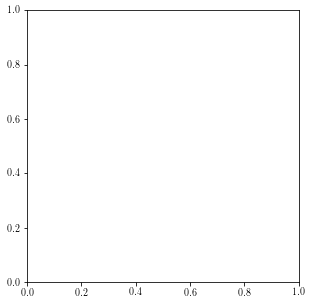

In [114]:
display(oa1)
mcsrl.plot(0, value=values[0], policy=policies[0])

In [115]:
ep = mcsrl.simulate(agents = mcsrl.agent_control, policy =policies, T= 20, mdp2 =grid_mdp, animation="sharedstateoa")

20
e [[(0, 0, 0, 0), (0, 0, 0, 3)]]


ValueError: too many values to unpack (expected 2)

In [74]:
mcsrl.reward[0][2][3][0][3][2]

0.020000000000000018

In [75]:
mcsrl.reward[0][2][3][2][3][0]

0.020000000000000018

In [8]:
grid_mdp.all_labels

[('a',), ('b',), ('c',), ('d',)]

In [43]:
mcsrl.reward[0][5]

array([[[[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]],

    

### not shared state -> shared oa -> works but high number of episodes required. -> episodes > 30k 

In [8]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [6]:
from logger import Trace

In [7]:
qval, ep_returns, trace = mcsrl.combined_qlearning(T=70, K=75000, debug=False)

In [8]:
trace.df.head(n=5)

,iteration,episode,step,labels,labels_seen,state_0,state_1,reward_0,reward_1,action_0,action_1,available_actions_0,available_actions_1
0,0,74996,0,"(c, d)",{},"[0, 0, 0, 0]","[0, 0, 0, 3]",0.0,0.0,[1],[1],"[0, 1, 2, 3]","[0, 1, 2, 3]"
1,0,74996,1,"(a,)",{a},"[0, 0, 1, 0]","[0, 0, 1, 3]",0.0,0.0,[2],[3],"[0, 1, 2, 3]","[0, 1, 2, 3]"
2,0,74996,2,"(a, b)","{b, a}","[0, 1, 1, 0]","[0, 1, 1, 2]",0.0,0.0,[1],[2],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
3,0,74996,3,"(a,)","{b, a}","[0, 1, 1, 0]","[0, 1, 1, 3]",0.0,0.0,[1],[1],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
4,0,74996,4,"(a,)","{b, a}","[0, 1, 1, 0]","[0, 1, 2, 3]",0.0,0.0,[1],[1],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"


In [9]:
policies = [np.argmax(qval[0],axis=4), np.argmax(qval[1],axis=4)]
values = [np.max(qval[0],axis=4), np.max(qval[1],axis=4)]

Text(0.5, 1.0, 'return per episode')

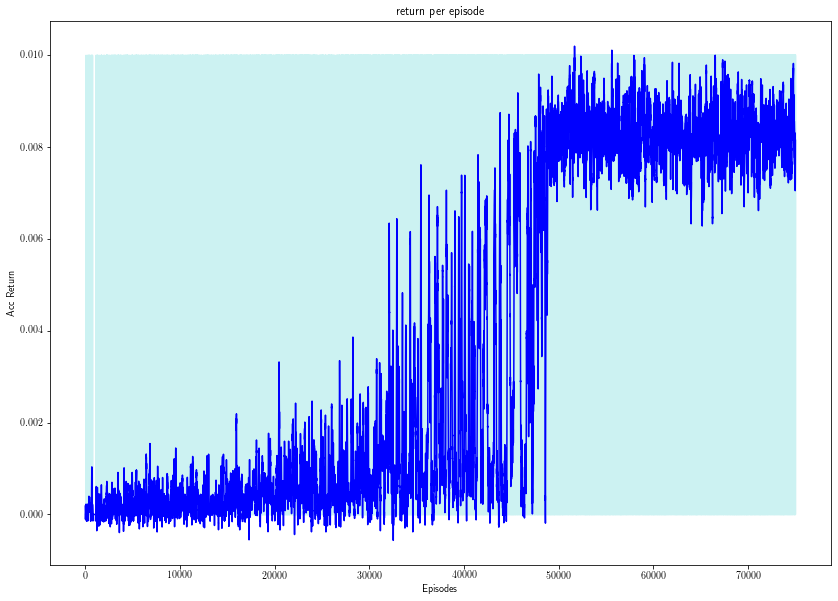

In [10]:
plt.figure(figsize=(14, 10))
plt.plot( ep_returns[:,0], color='c', label='agent 0', alpha=0.2)
yhat = savgol_filter(ep_returns[:,0], 101, 3) # window size 101, polynomial order 3
yhat2 = savgol_filter(ep_returns[:,1], 101, 3)
plt.plot(yhat, color='b', label='smooth')
# plt.plot(yhat2, color='g', label='smooth2')
# plt.plot(np.arange(0, ep_returns.shape[0]), ep_returns[:,1], color='g',  label='agent 1')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Episodes")
plt.ylabel("Acc Return")
plt.title("return per episode")

In [12]:
trace.save('shared_oa_ex2_returns_df.csv')
np.savetxt('shared_oa_ex2_returns.csv', ep_returns, delimiter=',')

In [11]:
#ltl1 = '(!a U b) & F d & FG c'
display(oa1)
mcsrl.plot(0, policies[0], values[0])

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=3), …

In [28]:
mcsrl.plot(1, policies[1], values[1])

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=3), …

### Baseline 

#### TODO : figure out how to arrange reward for this example.

In [5]:
qval_base, ep_returns_base, base_trace = mcsrl.combined_qlearning_noshaping(T=70, K=75000, map= 'bench1', debug=False)

(2, 4, 4, 4)


In [6]:
policies_b = [np.argmax(qval_base[0],axis=2), np.argmax(qval_base[1],axis=2)]
values_b = [np.max(qval_base[0],axis=2), np.max(qval_base[1],axis=2)]

Text(0.5, 1.0, 'return per episode')

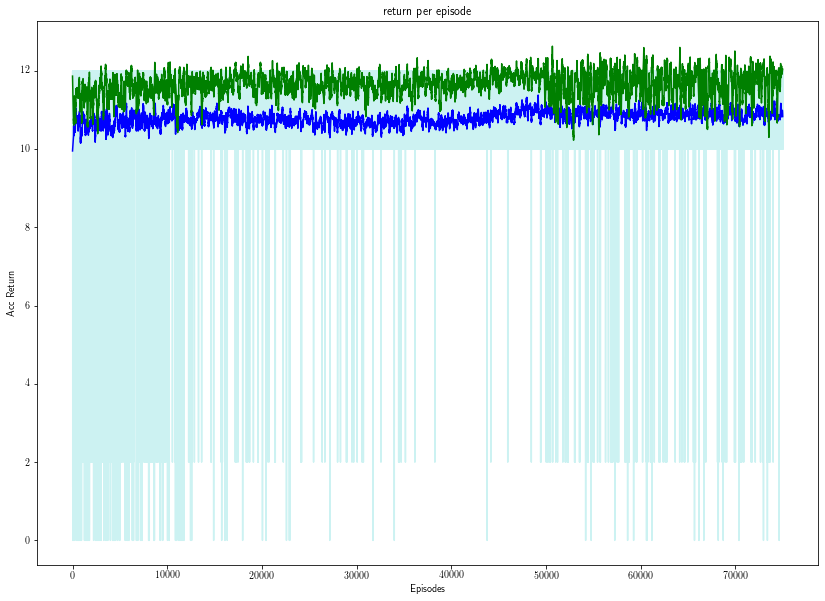

In [9]:
plt.figure(figsize=(14, 10))
plt.plot( ep_returns_base[:,0], color='c', label='agent 0', alpha=0.2)
# plt.plot( ep_returns_base[:,0], color='m', label='agent 0', alpha=0.2)
yhat = savgol_filter(ep_returns_base[:,0], 201, 3) # window size 101, polynomial order 3
yhat2 = savgol_filter(ep_returns_base[:,1], 201, 3)
plt.plot(yhat, color='b', label='smooth')
plt.plot(yhat2, color='g', label='smooth2')
# plt.plot(np.arange(0, ep_returns.shape[0]), ep_returns[:,1], color='g',  label='agent 1')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Episodes")
plt.ylabel("Acc Return")
plt.title("return per episode")

In [10]:
base_trace.save('shared_oa_ex2_returns_df_base.csv')
np.savetxt('shared_oa_ex2_returns_base.csv', ep_returns_base, delimiter=',')

In [50]:
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

### Plotting & video

In [86]:
from plotter import Plotter
from annotation import Annotation

In [87]:
grid_mdp.A

['U', 'D', 'R', 'L']

In [92]:
annotation = Annotation(grid_mdp, oa1, interactive= ['a', 'b'], targets=['c', 'd'])

In [93]:
annotation.landmark_label

['a', 'b']

In [94]:
video_recorder = Plotter(annotation, grid_mdp)

In [95]:
df_t=trace.get_episode(44998)
df_t.head(n=15)

,iteration,episode,step,labels,labels_seen,state_0,state_1,reward_0,reward_1,action_0,action_1,available_actions_0,available_actions_1
140,0,44998,0,(),{},"[0, 0, 0, 0]","[0, 0, 0, 3]",[0.0],[0.0],[2],[1],"[0, 1, 2, 3]","[0, 1, 2, 3]"
141,0,44998,1,"(b,)",{b},"[0, 0, 0, 0]","[0, 0, 1, 3]",[0.0],[0.0],[0],[3],"[0, 1, 2, 3]","[0, 1, 2, 3]"
142,0,44998,2,(),{b},"[0, 0, 0, 0]","[0, 0, 1, 2]",[0.0],[0.0],[3],[3],"[0, 1, 2, 3]","[0, 1, 2, 3]"
143,0,44998,3,"(a, b)","{b, a}","[0, 0, 0, 0]","[0, 0, 2, 2]",[0.0],[0.0],[1],[0],"[0, 1, 2, 3]","[0, 1, 2, 3]"
144,0,44998,4,"(a,)","{b, a}","[0, 1, 1, 0]","[0, 1, 1, 2]",[0.0],[0.0],[1],[1],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
145,0,44998,5,"(a, d)","{d, b, a}","[0, 1, 1, 0]","[0, 1, 2, 2]",[0.0],[0.0],[3],[1],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
146,0,44998,6,"(a, d)","{d, b, a}","[0, 1, 1, 0]","[0, 1, 3, 2]",[0.0],[0.0],[2],[0],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
147,0,44998,7,"(d,)","{d, b, a}","[0, 1, 1, 0]","[0, 1, 3, 2]",[0.0],[0.0],[1],[0],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
148,0,44998,8,"(c, d)","{d, b, c, a}","[0, 1, 2, 0]","[0, 1, 3, 2]",[0.0],[0.0],[1],[0],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
149,0,44998,9,"(c, d)","{d, b, c, a}","[0, 1, 3, 0]","[0, 1, 3, 2]",[0.0],[0.0],[6],[0],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"


In [96]:
df_t.shape

(70, 13)

In [97]:
video_recorder.record('sharedoa2/shared_oa_ex2_returns.mp4', trace.get_episode(44998).head(20)) 

100%|██████████| 20/20 [00:00<00:00, 20.90it/s]


<Figure size 432x288 with 0 Axes>

In [187]:
ep = mcsrl.simulate(agents = mcsrl.agent_control, policy =policies, T= 20, mdp2 =grid_mdp, animation="sharedoa2")

20
e [[(0, 0, 0, 0), (0, 0, 0, 3)]]
0 :  (0, 0, 0) 	 (0, 0, 3)
1 :  (0, 1, 0) 	 (0, 1, 3)
2 :  (1, 1, 0) 	 (1, 1, 2)
3 :  (1, 2, 0) 	 (1, 1, 3)
4 :  (1, 2, 0) 	 (1, 1, 2)
5 :  (1, 2, 0) 	 (1, 2, 2)
6 :  (1, 2, 0) 	 (1, 3, 2)
7 :  (1, 2, 0) 	 (1, 3, 2)
8 :  (1, 2, 0) 	 (1, 3, 2)
9 :  (1, 3, 0) 	 (1, 3, 2)
10 :  (2, 3, 0) 	 (1, 3, 2)
11 :  (3, 3, 0) 	 (1, 3, 2)
12 :  (3, 3, 0) 	 (1, 3, 2)
13 :  (3, 3, 0) 	 (1, 3, 2)
14 :  (3, 3, 0) 	 (1, 3, 2)
15 :  (3, 3, 0) 	 (1, 3, 2)
16 :  (3, 3, 0) 	 (1, 3, 2)
17 :  (3, 3, 0) 	 (1, 3, 2)
18 :  (3, 3, 0) 	 (1, 3, 2)
19 :  (3, 3, 0) 	 (1, 3, 2)
